In [51]:
from sklearn.datasets import make_classification
x,y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

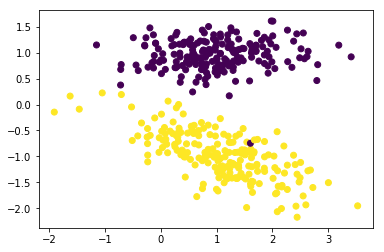

In [52]:
#convert our y-label into {1,-1}
y[y==0] = -1

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [13]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    def hingeLoss(self,W,b,x,y):
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        
        m=x.shape[0]
        
        for i in range(m):
            ti = y[i]*(np.dot(W,x[i].T)+b)
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
        
    def fit(self,x,y,batch_size=100,learning_rate=0.001,maxItr=100):
        no_of_features = x.shape[1]
        no_of_samples = x.shape[0]
            
        n = learning_rate
        c = self.C
            
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
            
        print(self.hingeLoss(W,bias,x,y))
            
        #Training form here....
        #weight and bias update rule
        losses = []
        
        for i in range(maxItr):
            #training loop
            l=self.hingeLoss(W,bias,x,y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            #batch gradient descent(paper) wit random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #assume zero gradient for the batch
                gradw=0
                gradb=0
                #iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = y[i]*(np.dot(W,x[i].T)+bias)
                        
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += c*y[i]*x[i]
                            gradb += c*y[i]
                #Gradient for batch is ready! update weight and bias
                W = W - n*W +n*gradw
                bias=bias + n*gradb
        self.W=W
        self.b=bias
        return W,bias,losses
            

In [12]:
ids=np.arange(100)
np.random.shuffle(ids)
print(ids)

[51 12 52 86 87 53  4 50 88 62 64  6 70 99 69 85 41 35 95 75 48 97  2 79
 22 45 38 55  3 90 81 54 78 32 74 11 37  8 19 42 47 63 71 56 83 25 24 89
 34 30 59 21 92 43 65 20 29 72 96 17  9 46 26 80 77 15 16 13 33 23 76 58
 67  7 31 27 18 68 10 40 84 61 39 44 57 98  0 49 94 60 66  1  5 28 82 91
 14 36 93 73]


In [6]:
mySVM=SVM()

In [27]:
W,b,losses=mySVM.fit(x,y)

400.0


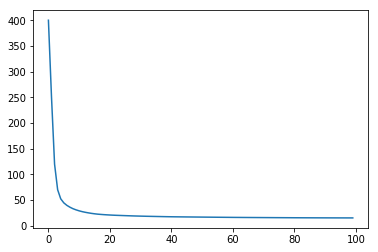

In [31]:
plt.plot(losses)

In [35]:
W,b=mySVM.W,mySVM.b

In [47]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)#generating some x1
    x2=-(w1*x1+b)/w2 #from equation w1x1+w2x2+b=0(hyplane eq) or WT+B=0
    xp=-(w1*x1+b+1)/w2 #WT+B = -1
    xn=-(w1*x1+b-1)/w2#WT+B =1
    plt.plot(x1,x2,label="Hyperpalne WX+B=0")
    plt.plot(x1,xp,label=" +ve Hyperpalne WX+B=1")
    plt.plot(x1,xn,label=" -ve Hyperpalne WX+B=-1")
    plt.legend()
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.show()
    

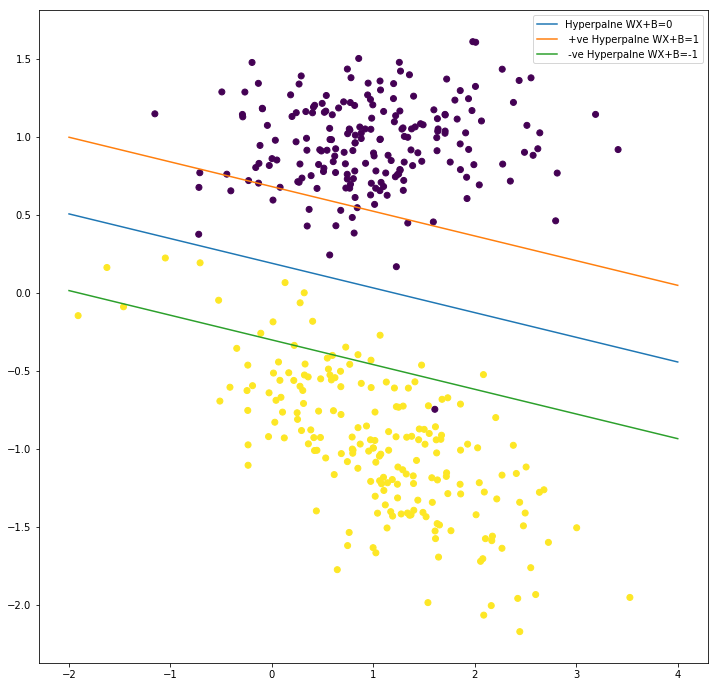

In [48]:
plotHyperplane(W[0,0],W[0,1],b)

## Non linearly Seprable Data

In [49]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

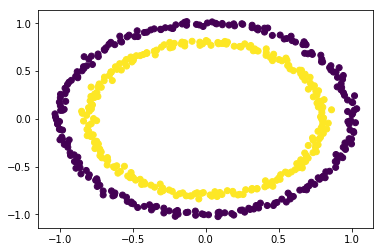

In [60]:
x,y = make_circles(n_samples=500,noise=0.02)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [61]:
def phi(x):
    #apply non linear transformation
    x1=x[:,0]
    x2=x[:,1]
    x3=x1**2+x2**2
    
    x_=np.zeros((x.shape[0],3))
    print(x_.shape)
    x_[:,:-1]=x
    x_[:,-1]=x3
    return x_

In [76]:
def plot3d(x,show=True):
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111,projection='3d')
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',s=20,c=y,depthshade=True)
    if(show==True):
        plt.show()
    
    return ax

(500, 3)


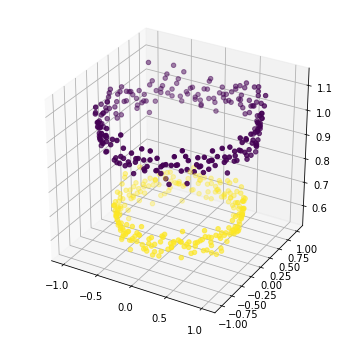

In [63]:
x_=phi(x)
plot3d(x_)

In [64]:
#logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lg=LogisticRegression()

In [68]:
acc=cross_val_score(lg,x,y,cv=5).mean()
print(acc)
acc=cross_val_score(lg,x_,y,cv=5).mean()
print(acc)

0.454
1.0


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [72]:
#visualise the decision surface
lg.fit(x_,y)
wts=lg.coef_
bias=lg.intercept_

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]

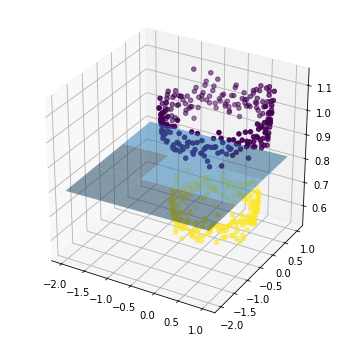

In [78]:
ax=plot3d(x_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

In [102]:
from sklearn import svm
svc=svm.SVC(kernel="poly")
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [103]:
svc.fit(x,y)
svc1=svm.SVC(kernel=custom_kernel)
svc1.fit(x,y)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function custom_kernel at 0x000001EE06456D08>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [105]:
print(svc.score(x,y))
svc1.score(x,y)

0.606


1.0

### Grid Search for Best Hyperparameters

In [106]:
#using mnsit dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV


In [107]:
params=[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

In [110]:
#Dataset prepare
data=load_digits()
X=data.data
Y=data.target

In [112]:
#acc of logistic regression
lg.fit(X,Y)
sc=cross_val_score(lg,X,Y,cv=5,scoring="accuracy").mean()
print(sc)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

0.9210188113360701


In [118]:
#now svm
svc=svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

0.44878680061604637

### Tuning Params using Gridsearch

In [119]:
import multiprocessing #how many cpus are available
cpus=multiprocessing.cpu_count()
print(cpus)


8


In [120]:
gs=GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs=cpus)

In [121]:
gs.fit(X,Y)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [122]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [123]:
gs.best_score_

0.9699499165275459

# Image Classificaton using SVM

In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


In [7]:
p=Path("../Datasets/Images/images")
dirs=p.glob("*")
labels_dict={"cat":0,"dog":1,"horse":2,"human":3}
image_data = []
labels=[]
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    

In [10]:
#convert data into numpy array
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)
image_data.shape

(808, 32, 32, 3)

In [11]:
#suffle data
import random 
combined=list(zip(image_data,labels))
random.shuffle(combined)
#unzip
image_data[:],labels[:]=zip(*combined)
# visualise this data
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return


In [12]:
#svm classifier
## we need to convert data for one vs one classification case
M = image_data.shape[0]#no of samples
image_data =image_data.reshape(M,-1)
print(image_data.shape)

(808, 3072)


In [14]:
CLASSES = len(np.unique(labels))
def classWiseData(x,y):
    data ={}
    for i in range(CLASSES):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [15]:
data=classWiseData(image_data,labels)

In [17]:
data[0].shape[0]#cats

202

In [27]:
def getDataPairForSVM(d1,d2):#combines data of two classes into a single matrix
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1]=-1
    data_labels[l1:]=1
    return data_pair,data_labels

#### Training NC2 SVM'S Part!

404.0


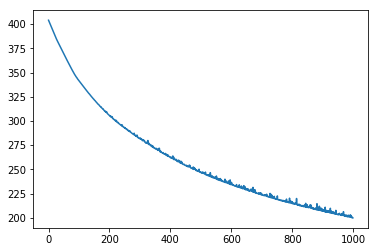

In [56]:
mysvm=SVM()
#to check learning rate
xp,yp=getDataPairForSVM(data[0],data[1])
w,b,loss=mysvm.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
plt.plot(loss)#diverging loss means high learning rate

In [58]:
def trainSVMs(x,y):
    svm_classifiers ={}
    for i in range(CLASSES):
        svm_classifiers[i]={}
        for j in range(i+1,CLASSES):
            xpair,ypair=getDataPairForSVM(data[i],data[j])
            wts,b,loss=mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j]=(wts,b)
            
    return svm_classifiers

In [59]:
svm_classifiers= trainSVMs(image_data,labels)

404.0
404.0
404.0
404.0
404.0
404.0


In [44]:
def binaryPredict(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else :
        return -1

In [45]:
def predict(x):
    count = np.zeros((CLASSES,))
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b=svm_classifiers[i][j]
            #take a majority prediction
            z=binaryPredict(x,w,b)
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    return final_prediction


In [46]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if prediction==y[i]:
            count+=1
    return count/x.shape[0]
    

In [60]:
acc=accuracy(image_data,labels)
print(acc)

0.6051980198019802


In [61]:
from sklearn import svm

In [62]:
svm_classifiers=svm.SVC(kernel='linear',C=1.0)

In [63]:
svm_classifiers.fit(image_data,labels)
svm_classifiers.score(image_data,labels)

0.6621287128712872